# Práctica Final
Machine learning: Modelos Supervisados. CUNEF: Curso 2021/2022

#### Martiarena Martín, Nicolás

### **Índice**

1. Definición del problema a resolver


2. Exploración general de los datos


3. Separación de datos en train y test


4. Tratamiento de valores missing


5. Codificación de variables categóricas


6. Estandarización y escalado de variables 


7. Aplicación de algoritmos


    7.1. Regresión Lineal
    7.2. K-Nearest Neighbor (KNN)
    7.3. Random Forest
    7.4. Support Vector Machine
    7.5. Gradient Boost
       
8. Conclusiones 

## 1. Definición del problema a resolver

Comenzaremos el proyecto siguiendo los pasos habituales que se realizan dentro de un proyecto de machine learning para poder conseguir un modelo de predicción. Empezaremos por especificar el problema al que nos enfrentaremos y sobre qué datos lo abordaremos 

El objetivo de la práctica será el de generar distintos algoritmos que nos permitan predecir los precios de viviendas suscritas en la plataforma Airbnb a partir de las distintas características que tengan estos alojamientos. Para ello, haremos uso de metodologías supervisadas de machine learning explicadas en clase, y que son comunmente utilizadas para realizar este tipo de proyectos. Se utilizarán distintos métodos, identificaremos qué variables son las más relevantes a la hora de realizar el ejercicio de predicción y evaluaremos de todos los métodos utilizados cual se ajusta mejor a las condiciones del problema según las distintas características y resultados a los que concluyamos. En poryectos de machine learning, la actividad de predicción se hace mediante procesos de clasificación o regresión. Al tratarse de la predicción del precio de una vivienda trataremos por tanto con modelos de regresión. 

In [150]:
#Importación de las librerías a utilizar para el preprocesado de los datos 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importación de los datos
BD=pd.read_excel("C:/Users/nmartiarenamartin/OneDrive - Deloitte (O365D)/Desktop/ML No Supervisados/airbnb.xlsx")

In [4]:
data=BD

Una vez definido el problema que vamos a abordar haremos un análisis exploratorio de los datos para determinar qué cambios harán falta con el objetivo de poder contar con un dataset que sea adecuado para realizar los análisis correspondientes. Será importante comprender qué información contiene cada variable y qué cambios a realizar serán necesarios. 

## 2. Exploración general de los datos

**Dimensiones del dataset y tipos de variables**

In [5]:
#Dimensiones de la tabla 
data.shape

(14780, 89)

Contamos con una base de datos para realizar nuestro modelo con unas bases de datos con 14.780 filas y 89 columnas. Procederemos a analizar el tipo de cada una de las variables. 

In [6]:
#Tipos de cada columna
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID                              14780 non-null  int64         
 1   Listing Url                     14780 non-null  object        
 2   Scrape ID                       14780 non-null  int64         
 3   Last Scraped                    14780 non-null  datetime64[ns]
 4   Name                            14778 non-null  object        
 5   Summary                         14188 non-null  object        
 6   Space                           10886 non-null  object        
 7   Description                     14774 non-null  object        
 8   Experiences Offered             14780 non-null  object        
 9   Neighborhood Overview           9134 non-null   object        
 10  Notes                           5630 non-null   object        
 11  Tr

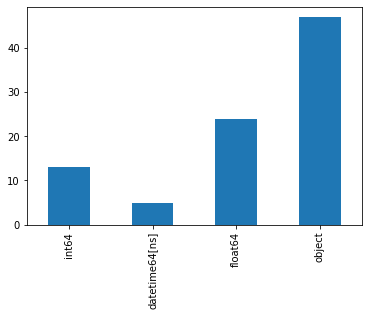

In [7]:
data_types=data.dtypes
data_types.groupby(data_types.values).count().plot.bar()
plt.show()

In [8]:
pd.options.display.max_columns=0 
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,...,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,58386783,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,...,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza CataluÃ±a Catalonia Square is the larg...,NaN,Ideal to discover the city either on foot or b...,Travellers will have access to the entire apar...,We will be more than happy to help you with an...,CHECK-IN Week Days: The check-in and key colle...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,102947901,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,NaN,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,...,4,1.0,1.0,1.0,Real Bed,"Wireless Internet,Air conditioning,Elevator in...",NaN,70.0,NaN,NaN,200.0,40.0,2,44,1,1125,today,NaN,6,21,39,309,2017-04-08,1,2017-03-05,2017-03-05,80.0,8.0,10.0,10.0,10.0,8.0,

Tras un primer vistazo al tipo de variables a las que nos enfrentaremos, vemos que la gran mayoría son de tipo object y que muchas no serán de utilidad a la hora de contruir el modelo de predicción. De estas variables tipo object (potenciales cualitativas), analizamos sus principales características a continuación:

**Características de variables tipo object**

In [9]:
pd.options.display.max_columns=0 
data.select_dtypes(include=["object"]).describe()

,Listing Url,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host URL,Host Name,Host Location,Host About,Host Response Time,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Property Type,Room Type,Bed Type,Amenities,Calendar Updated,Has Availability,License,Jurisdiction Names,Cancellation Policy,Geolocation,Features
count,14780,14778,14188,10886,14774,14780,9134,5630,9064,8296,8218,9278,11960,11960,14761,11960,14780,14777,14737,9539,12881,14777,14777,10904,14774,14780,9551,14780,13760,14774,14636,14274,14723,14780,14780,14779,14780,14780,14780,14610,14780,12,349,227,14780,14780,14779
unique,14780,14374,13288,10172,14281,5,7912,4638,7837,7107,6578,7702,11957,11957,14757,11957,8935,3276,568,5007,4,8893,8893,395,206,1646,390,478,49,246,102,617,43,257,18,17,22,3,5,12379,57,1,316,12,8,14780,88
top,https://www.airbnb.com/rooms/11210388,Apartamento en el centro de Madrid,"Unique apartment in vibrant neighborhoods, car...",Los Apartamentos Good Stay Prado se encuentran...,Es un piso con 6 habitaciones de las que 5 ha...,none,Se trata de una de las zonas mÃ¡s emblemÃ¡tica...,"Check in time is at 3pm or later, although som...","It is calm, quite zone and you donâ€™t have to...","Wifi, TV, washing machine, Microwave, full equ...",We will arrange the check in time depending on...,Checkin is done at our office. The address: Ca...,https://a0.muscache.com/im/pictures/4fb56b8a-2...,https://a0.muscache.com/im/pictures/4fb56b8a-2...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/4fb56b8a-2...,https://www.airbnb.com/users/show/54310958,Javier,"Madrid, Community of Madrid, Spain",Be Mate offers the exclusive City Mate service...,within an hour,https://a0.muscache.com/im/pictures/8f3ec0f2-1...,https://a0.muscache.com/im/pictures/8f3ec0f2-1...,MalasaÃ±a,"email,phone,reviews,jumio","Embajadores, Madrid, Comunidad de Madrid 28012...",MalasaÃ±a,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",today,t,City registration pending,Paris,strict,"30.3373609355,-97.8632766782","Host Has Profile Pic,Host Identity Verified,Is..."
freq,1,12,64,29,19,14763,32,53,41,55,66,81,3,3,3,3,159,307,9339,159,7905,159,159,1003,3660,590,895,1849,6780,13207,10623,2065,13274,13194,14001,14001,11962,8976,14456,41,3924,12,15,108,5742,1,2508


In [10]:
print("-------------")
print(pd.value_counts(data["Experiences Offered"]))
print("-------------")
print(pd.value_counts(data["Host Response Time"]))
print("-------------")
print(pd.value_counts(data["Room Type"]))
print("-------------")
print(pd.value_counts(data["Bed Type"]))
print("-------------")
print(pd.value_counts(data["Cancellation Policy"]))

-------------
none        14763
business        8
family          3
social          3
romantic        3
Name: Experiences Offered, dtype: int64
-------------
within an hour        7905
within a few hours    2872
within a day          1802
a few days or more     302
Name: Host Response Time, dtype: int64
-------------
Entire home/apt    8976
Private room       5595
Shared room         209
Name: Room Type, dtype: int64
-------------
Real Bed         14456
Pull-out Sofa      258
Futon               42
Couch               19
Airbed               5
Name: Bed Type, dtype: int64
-------------
strict             5742
flexible           4671
moderate           4248
strict_new           34
super_strict_60      32
moderate_new         20
super_strict_30      19
flexible_new         14
Name: Cancellation Policy, dtype: int64


Seguidamente, comenzamos a anlizar la características de las variables numéricas y las de tipo fecha:

**Características de las variables cuantitativas**

In [11]:
pd.options.display.max_columns=0 
data.select_dtypes(include=["number"]).describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,39.000000,14777.000000,14777.000000,1.478000e+04,1.478000e+04,14780.000000,14725.000000,14755.000000,14731.00000,598.000000,14763.000000,3590.000000,3561.000000,6256.000000,8687.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,0.883077,12.513636,12.513636,1.419691e+16,-1.903204e+16,3.277808,1.281732,1.343816,2.04426,390.456522,73.561471,376.937883,1426.125246,189.226822,31.805341,1.589986,7.690460,3.050474,945.168742,8.954736,22.996211,39.869621,202.104465,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,0.240582,34.090223,34.090223,1.683373e+16,1.888629e+16,2.097291,0.658517,0.900078,1.61277,637.134930,72.062050,195.701043,1246.403853,115.151070,30.878599,1.182550,12.971352,12.266517,8439.321218,9.333252,19.731371,29.621456,127.886822,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,0.000000,-3.784252e+16,-6.319924e+16,1.000000,0.000000,0.000000,1.00000,0.000000,9.000000,70.000000,250.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,0.850000,1.000000,1.000000,4.041054e+15,-3.701658e+16,2.000000,1.000000,1.000000,1.00000,0.000000,34.000000,215.000000,720.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,0.000000,4.000000,12.000000,78.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,1.000000,2.000000,2.000000,4.042561e+15,-3.583752e+16,3.000000,1.000000,1.000000,2.00000,98.500000,55.000000,350.000000,1200.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,6.000000,20.000000,38.000000,239.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,1.000000,6.000000,6.000000,4.040103e+16,-3.698100e+15,4.000000,1.000000,2.000000,2.00000,646.000000,86.000000,500.000000,1725.000000,200.000000,40.000000,2.000000,15.000000,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,1.000000,519.000000,519.000000,5.595261e+16,6.156701e+16,16.000000,8.000000,10.000000,16.00000,6997.000000,999.000000,999.000000,25000.000000,990.000000,662.000000,16.000000,500.000000,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [12]:
pd.options.display.max_columns=0 

data.select_dtypes(include=["number"]).head()

,ID,Scrape ID,Host ID,Host Response Rate,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
0,11210388,20170306202425,58386783,100.0,NaN,1.0,1.0,3.033736e+16,-9.786328e+15,2,1.0,1.0,1.0,NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,10,34,64,281,42,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,3.50
1,17471131,20170407214050,102947901,100.0,NaN,162.0,162.0,4.138968e+16,2.172625e+16,4,1.0,1.0,1.0,NaN,70.0,NaN,NaN,200.0,40.0,2,44,1,1125,6,21,39,309,1,80.0,8.0,10.0,10.0,10.0,8.0,10.0,106.0,0.86
2,17584891,20170407214050,102947901,100.0,NaN,162.0,162.0,4.139303e+15,2.162173e+15,4,1.0,1.0,1.0,NaN,70.0,NaN,NaN,200.0,60.0,2,42,1,1125,7,21,42,291,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.0,NaN
3,5398030,20170407214050,131794,100.0,NaN,27.0,27.0,4.139697e+15,2.167418e+16,8,2.0,3.0,4.0,NaN,229.0,NaN,NaN,250.0,79.0,2,39,2,1125,11,24,47,316,13,92.0,10.0,9.0,10.0,10.0,10.0,9.0,24.0,1.09
4,18104606,20170407214050,54310958,99.0,NaN,207.0,207.0,4.138869e+15,2.155150e+16,5,1.0,2.0,2.0,NaN,149.0,NaN,NaN,NaN,55.0,1,0,2,1125,0,0,0,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0,NaN


,

**Características de las variables fecha**


In [13]:
#Identificación de las variables de tipo datetime 
data.describe(include=np.datetime64)

,Last Scraped,Host Since,Calendar last Scraped,First Review,Last Review
count,14780,14777,14780,11618,11617
unique,37,2116,38,1679,785
top,2017-04-08 00:00:00,2016-01-12 00:00:00,2017-04-08 00:00:00,2016-10-09 00:00:00,2017-04-02 00:00:00
freq,13627,180,9946,65,752
first,2016-01-04 00:00:00,2009-05-17 00:00:00,2016-01-04 00:00:00,2010-05-10 00:00:00,2012-08-04 00:00:00
last,2017-06-15 00:00:00,2017-04-07 00:00:00,2017-06-15 00:00:00,2017-06-09 00:00:00,2017-06-13 00:00:00


Analizando la información que contiene cada variable podemos concluir que muchas de ellas no serán de utilidad a la hora de realizar el análisis de predicción. Haremos un filtrado donde nos quedaremos con las variables cuantitativas. Por parte de las variables no numéricas, habiéndolas analizado una a una, solo parece tener utilidad como variable cualitativa "Cancellation Policy", "Bed Type", "Hot Response Time" al tener un número razonable de valores únicos. Las incluiremos tambien en la nueva tabla filtrada, con vistas a transformarlas en variables dummies. Por parte de las variables con formato fecha, las transformaremos a variables numéricas siendo estas los días que han pasado hasta el 15 de junio del 2022. 

**Transformación inicial de algunas variables: cambio formato fechas**

Las variables con formato fecha deberán ser transformadas a valores para poder adaptarlas al modelo de predicción.

Para transformar las variables fecha a integer, se deben eliminar los valores nulos que existan para las observaciones que lo requieran. Observaremos primero cuantos NAs contiene cada una, y en el caso de que el número sea muy alto eliminaremos la variable. Por el contrario, aquellos que cuenten con un número más bajo, los valores nulos serán sustituidos por la moda de la columna  


In [14]:
#Cuántos NAs hay en cada variable date. Si hay muchos será necesario eliminar la columna, ya que llenaríamos los celdas con 
#valores que no reflejan la realidad y si eso puede tener peso nuestro análisis se verá afectado 
data.select_dtypes(include=np.datetime64).isna().sum()

Last Scraped                0
Host Since                  3
Calendar last Scraped       0
First Review             3162
Last Review              3163
dtype: int64

Dejaremos fuera las variables "First Review" y "Last Review", las cuales muestran número muy elevado de valores nulos y al rellenarlos podrían distorsionar nuestro modelo. Para el resto de variables fecha, las transformaremos en valores numéricos por el método comentado.

In [15]:
data=data.drop(["First Review", "Last Review"], axis=1)

Rellenamos los 3 valores nulos con la fecha media. Al ser solo 3, no afectará significativamente al modelo 

In [16]:
data["Host Since"]=data["Host Since"].fillna(data["Host Since"].mean())

In [17]:
data["Host Since"].isna().sum()

0

**Transformaciones de las variables fecha a variables numéricas** 

In [18]:
d = datetime.strptime("2022-06-15", "%Y-%m-%d")

data["Last Scraped"]= (d-data["Last Scraped"])
data["Last Scraped"]=(data["Last Scraped"] / np.timedelta64(1, 'D')).astype(int)

data["Host Since"]= (d-data["Host Since"])
data["Host Since"]=(data["Host Since"] / np.timedelta64(1, 'D')).astype(int)

data["Calendar last Scraped"]= (d-data["Calendar last Scraped"])
data["Calendar last Scraped"]=(data["Calendar last Scraped"] / np.timedelta64(1, 'D')).astype(int)



**Eliminación de variables no relevantes para el modelo de predicción**

Con el objetivo de mantener un dataset limpio y óptimo, retiraremos aquellas columnas que no vayan a ser necesarias o que no aportarían información relevante para nuestro estudio, tanto cuantitativas como cualitativas

In [19]:
#Variables numéricas
data_filtrado= data.drop(["ID", "Scrape ID","Host ID","Latitude","Longitude"], axis=1)

#Variables object
data_filtrado = data_filtrado.drop(["Listing Url","Name","Summary","Space","Description",
                          "Neighborhood Overview","Notes",
                          "Transit","Access","Interaction","House Rules","Thumbnail Url",
                          "Medium Url","Picture Url","XL Picture Url","Host URL",
                          "Host Name","Host Location","Host About",
                          "Host Thumbnail Url","Host Picture Url","Host Neighbourhood",
                          "Host Verifications","Street","Neighbourhood","Neighbourhood Cleansed",
                          "Neighbourhood Group Cleansed","City","State","Zipcode","Market","Smart Location",
                          "Country Code","Country","Property Type","Amenities",
                          "Calendar Updated","Has Availability","License","Jurisdiction Names",
                          "Geolocation","Features","Experiences Offered"], axis=1)

**Análisis variable objetivo**

Haremos un análisis de la distribución que sigue nuestra variable objetivo, la cual nos interesa al ser la que pretendemos predecir con los distintas metodologías. 

In [20]:
data["Price"].describe()

count    14763.000000
mean        73.561471
std         72.062050
min          9.000000
25%         34.000000
50%         55.000000
75%         86.000000
max        999.000000
Name: Price, dtype: float64

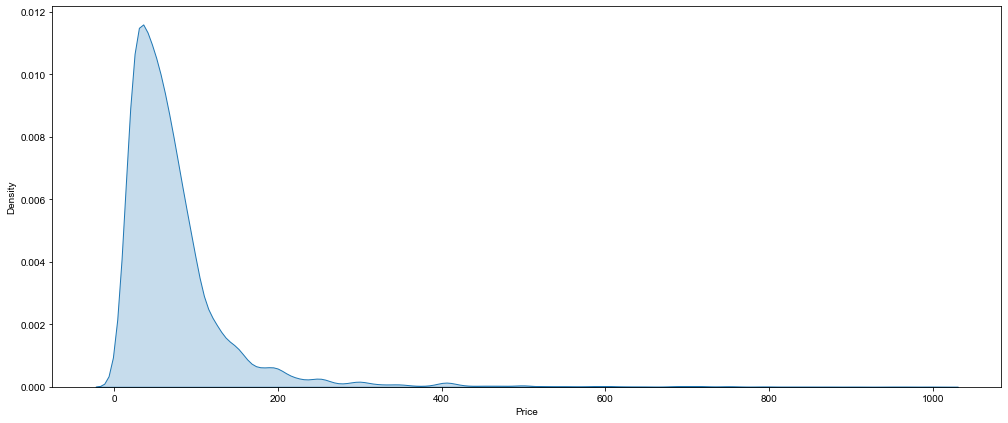

In [21]:
plt.subplots(figsize=(17,7))

sns.set(style="darkgrid")
sns.kdeplot(data["Price"], shade=True)
plt.show()

La gráfica de la variable objetivo nos muestra que la variable cuenta con una distribución sesgada hacia la izquierda, por lo que no es del todo simétrica. Esto es ya un indicador de que, con estos datos, nuestro modelo funcionará mejor para predecir precios bajos que los altos. 


**Rápido análisis de los valores nulos**

Muchos de los algoritmos de machine learning no aceptan observaciones con NAs, por lo que será necesario realizar modificar aquellos valores que sean nulos para poder trabajar con la base de datos.
Empezaremos observando el número de valores nulos que hay en cada una de las columnas del dataset.

In [22]:
#Número de valores ausentes en cada una de las variables (ordenado de menor a mayor). 
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(pd.DataFrame(data_filtrado.isna().sum().sort_values()))


                                    0
Last Scraped                        0
Cancellation Policy                 0
Number of Reviews                   0
Calendar last Scraped               0
Availability 365                    0
Availability 90                     0
Availability 60                     0
Availability 30                     0
Maximum Nights                      0
Minimum Nights                      0
Extra People                        0
Bed Type                            0
Guests Included                     0
Host Since                          0
Accommodates                        0
Room Type                           0
Host Listings Count                 3
Host Total Listings Count           3
Calculated host listings count      4
Price                              17
Bedrooms                           25
Beds                               49
Bathrooms                          55
Host Response Time               1899
Host Response Rate               1899
Reviews per 

Eliminaremos por su gran numero de NAs las variables "Host Acceptance Rate", "Square Feet", "Monthly Price", "Weekly Price", "Security Deposit" y "Cleaning Fee", ya que más del 50% de sus observaciones no contienen información y no aportará nada relevante a la variable objetivo. Para el resto de columnas con un número significativo de NAs, estudiaremos sus respectivas relaciones con la variable objetivo para determinar qué acción realizar con ellas. Vemos, además, que muchas otras tienes más de 3000 NAs

In [23]:
data_filtrado= data_filtrado.drop(["Host Acceptance Rate",
                                   "Square Feet", "Monthly Price", 
                                   "Weekly Price",
                                   "Security Deposit", 
                                   "Cleaning Fee"], axis=1)

In [24]:
correlacion = data_filtrado.corr()

In [25]:
corr_price= data_filtrado.corr().loc[["Price"]].sort_values("Price", ascending=False)
corr_price = corr_price.T.sort_values('Price',ascending=False)

Text(0.5, 1.0, 'Correlación del precio de venta')

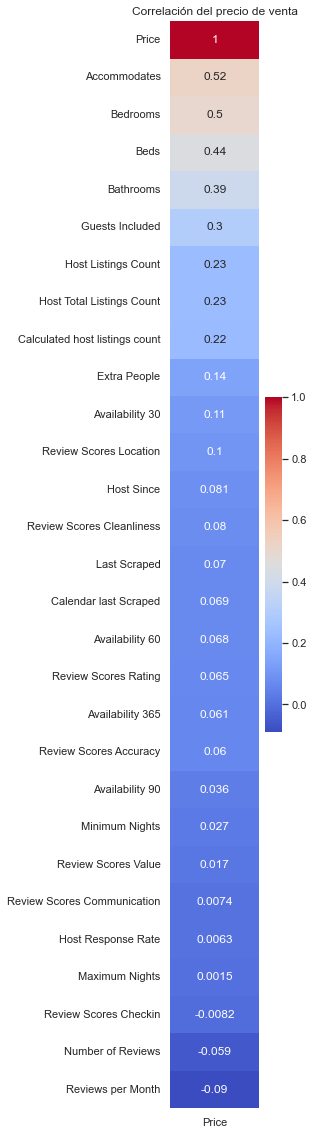

In [26]:
plt.subplots(figsize=(2,20))
sns.heatmap(corr_price, cmap="coolwarm",annot=True)
plt.title('Correlación del precio de venta')

Analizando la correlación de las variables con número de valores nulos superior a 3000, vemos que todas ellas tienen la característica común de referirse a "Review". La correlación que tienen con la variable Price (como vemos en la gráfica) está en torno a cero, por lo que nos encontramos con unos tipos de columnas que por un lado carecen de un parte significativa de la información y que además las información que sí tienen disponible explica muy poco el comportamiento de la variable objetivo. Como el objetivo de nuestro modelo será predecir, podemos concluir que estas variables no aportarán nada importante y teniendo en cuenta que el número de columnas es ya muy elevado, las eliminaremos del dataset.

In [27]:
data_filtrado2=data_filtrado.drop(["Reviews per Month",
                               "Review Scores Rating", 
                               "Review Scores Cleanliness",               
                               "Review Scores Communication",         
                               "Review Scores Accuracy",                  
                               "Review Scores Checkin",                   
                               "Review Scores Location",                  
                               "Review Scores Value"], axis=1)

In [28]:
data_filtrado2.shape

(14780, 25)

In [29]:
data_filtrado2.head()

,Last Scraped,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,Cancellation Policy,Calculated host listings count
0,1926,2316,within an hour,100.0,1.0,1.0,Entire home/apt,2,1.0,1.0,1.0,Real Bed,58.0,1,0,2,1125,10,34,64,281,1927,42,moderate,1.0
1,1894,2045,within an hour,100.0,162.0,162.0,Entire home/apt,4,1.0,1.0,1.0,Real Bed,70.0,2,44,1,1125,6,21,39,309,1894,1,super_strict_30,106.0
2,1894,2045,within an hour,100.0,162.0,162.0,Entire home/apt,4,1.0,1.0,1.0,Real Bed,70.0,2,42,1,1125,7,21,42,291,1894,0,super_strict_30,106.0
3,1894,4404,within an hour,100.0,27.0,27.0,Entire home/apt,8,2.0,3.0,4.0,Real Bed,229.0,2,39,2,1125,11,24,47,316,1894,13,strict,24.0
4,1894,2346,within an hour,99.0,207.0,207.0,Entire home/apt,5,1.0,2.0,2.0,Real Bed,149.0,1,0,2,1125,0,0,0,7,1894,0,flexible,92.0


**Heatmap de correlación**

Siguiendo con nuestro análisis, crearemos un mapa de calor con las correlaciones de las variables restantes. Esto nos permitirá ver si existen problemas de multicolinealidad entre variables, y ver si es posible quedarnos con una base de datos más eficiente para nuestro análisis. 

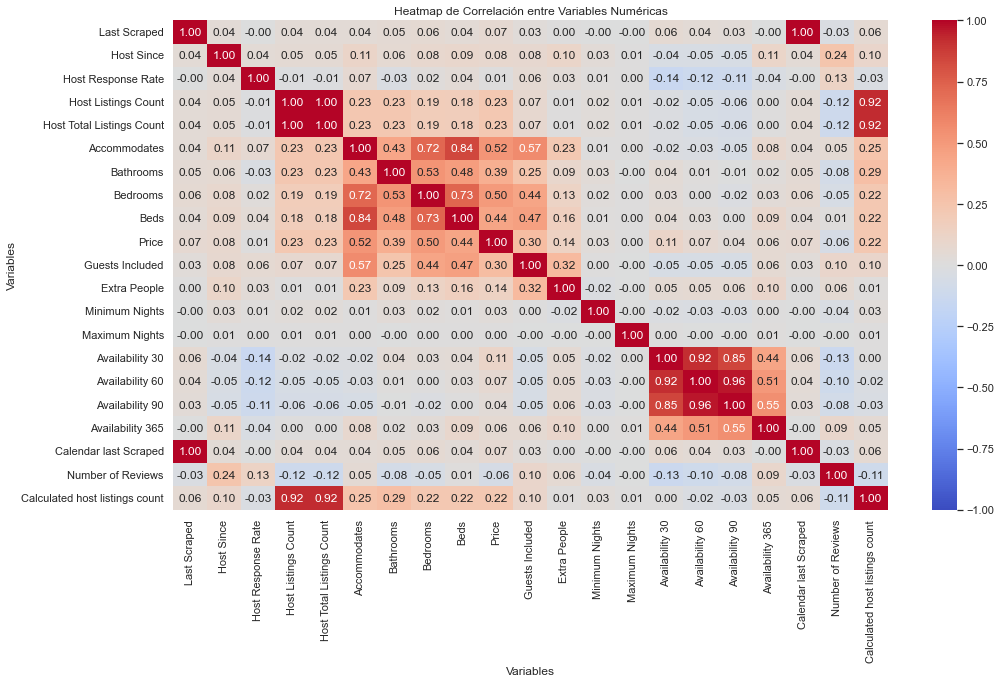

In [30]:
plt.figure(figsize=(16,9))
ax=sns.heatmap(data_filtrado2.corr(), cmap='coolwarm',
               annot=True,
              vmin=-1,
               vmax=1,
               center=0,fmt='.2f')#con fmt especificamos 2 dígitos de precisión y f se utiliza para representar un nºdecimal
ax.set(title='Heatmap de Correlación entre Variables Numéricas',
      ylabel='Variables',
      xlabel='Variables')
plt.show()

Gracias al mapa de calor de los coeficientes de correlación entre las variables, hemos podido identificar que varias variables guardan una relación muy fuerte entre ellas. Con la siguiente tabla, veremos de manera más fácil las correlaciones más altas del dataset junto con sus dos variables correspondientes:

In [31]:
#Variables con correlaciones superiores a 0.8 
corr2 = data_filtrado2.corr('pearson')
new_corr = corr2.abs()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[new_corr['correlation']>0.8]

,level_0,level_1,correlation
87,Host Total Listings Count,Host Listings Count,1.000000
378,Calendar last Scraped,Last Scraped,0.999770
351,Availability 90,Availability 60,0.963501
423,Calculated host listings count,Host Listings Count,0.922838
424,Calculated host listings count,Host Total Listings Count,0.922838
329,Availability 60,Availability 30,0.921476
350,Availability 90,Availability 30,0.849756
173,Beds,Accommodates,0.838797


Llama la atención que las variables "Host Total Listing Count" y "Host Listing Count" guardan un coeficiente de 1, por lo que se podría decir que ambas variables guardan entre ellas un comportamiento idéntico. Eliminaremos por tanto, una de ellas.
En el caso de "Calendar Last Scraped" con "Last Scraped", y "Availability 90" con "Availability 60" son de 0,999 y 0,963 respectivamente por lo que haremos el mismo ejercicio de eliminar una de ellas, con tal de simplificar la base de datos sin perder información. 

In [32]:
data_filtrado2=data_filtrado2.drop(["Host Total Listings Count", "Calendar last Scraped"], axis=1)

In [33]:
data_filtrado2.head()

,Last Scraped,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Cancellation Policy,Calculated host listings count
0,1926,2316,within an hour,100.0,1.0,Entire home/apt,2,1.0,1.0,1.0,Real Bed,58.0,1,0,2,1125,10,34,64,281,42,moderate,1.0
1,1894,2045,within an hour,100.0,162.0,Entire home/apt,4,1.0,1.0,1.0,Real Bed,70.0,2,44,1,1125,6,21,39,309,1,super_strict_30,106.0
2,1894,2045,within an hour,100.0,162.0,Entire home/apt,4,1.0,1.0,1.0,Real Bed,70.0,2,42,1,1125,7,21,42,291,0,super_strict_30,106.0
3,1894,4404,within an hour,100.0,27.0,Entire home/apt,8,2.0,3.0,4.0,Real Bed,229.0,2,39,2,1125,11,24,47,316,13,strict,24.0
4,1894,2346,within an hour,99.0,207.0,Entire home/apt,5,1.0,2.0,2.0,Real Bed,149.0,1,0,2,1125,0,0,0,7,0,flexible,92.0


In [34]:
data_filtrado.shape

(14780, 33)

## 3. Separación de datos en train y test

Con el objetivo de evaluar la capacidad predictiva del modelo que vamos a realizar, será necesario dividir el dataset para poder probarlo en diferentes conjuntos de datos. Esta evaluación de la predicción consistirá en determinar cuánto se asemejarán predicciones que realice con los valores reales. Para ello, será necesario dividir dividir los datos en dos parte: un conjunto de entrenamiento (train) y otro de evaluación (test).

Es importante que la distribución de la variable objetivo tras la división sea similar en el conjunto de entrenamiento y validación sea similar. La función train_test_split() de la librería scikit-learn permite cumplir esta condición y minimizar el potencial sesgo en su proceso de evaluación y predicción. Gracias al argumento "stratify" se puede seleccionar la variable a partir de la cual se hará el reparto. 

El conjunto de datos train será el utlizado para realizar el proceso de entrenamiento con los que el algoritmo "aprenderá" a ajustar el proceso de predicción. La calidad del modelo dependerá de la calidad de los datos y de cómo se ajustarán al modelo, por eso es imporante haber realizado un proceso de limpieza del dataset con este objetivo. El conjunto test nos permitirá evaluar el modelo sobre un conjunto de datos que conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no haya participado en el ajuste. 

Hasta ahora, quitando las transformaciones de las variables fecha y la eliminación de variables no relevantes, no hemos realizado ningún cambio que haya requerido cálculos en alguna de las columnas, condición necesaria antes de dividir el dataset.

Generalmente, el tamaño de la división depende de la cantidad de casos. En nuestro caso, clasificaremos un 70% de los datos como el conjunto de entrenamiento y un 30% como conjunto de evaluación.




In [35]:
#División de datos en train y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        data_filtrado2.drop('Price', axis = 'columns'),
                                        data_filtrado2['Price'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [36]:
train=pd.concat([X_train, y_train], axis=1)
test=pd.concat([X_test, y_test], axis=1)

print(train.shape)
print(test.shape)

(11824, 23)
(2956, 23)


In [37]:
train.head()

,Last Scraped,Host Since,Host Response Time,Host Response Rate,Host Listings Count,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Cancellation Policy,Calculated host listings count,Price
9943,1894,3561,within an hour,100.0,142.0,Entire home/apt,4,2.0,2.0,2.0,Real Bed,2,17,3,1125,6,14,20,176,0,strict,77.0,134.0
7400,1894,2438,within an hour,100.0,1.0,Entire home/apt,2,1.0,1.0,1.0,Real Bed,1,0,2,1125,0,5,20,102,0,flexible,1.0,35.0
8427,1894,3016,within a day,100.0,1.0,Entire home/apt,3,1.0,1.0,2.0,Real Bed,2,10,3,1125,6,6,6,40,2,flexible,1.0,55.0
3983,1918,3002,within an hour,100.0,2.0,Entire home/apt,8,3.5,4.0,8.0,Real Bed,8,10,5,30,7,35,52,124,0,strict,2.0,225.0
7592,1894,2753,within an hour,100.0,9.0,Entire home/apt,4,1.0,1.0,2.0,Real Bed,2,12,2,1125,10,35,58,318,65,strict,5.0,55.0


## 4. Tratamiento de valores missing

Previamente hemos visto como varias variables con números muy grandes de valores nulos han sido directamente eliminados. Una vez que el dataset ha sido dividido en dos subconjuntos porcederemos a tratar con los NAs de manera que suponga un transformación en esas observaciones a través de cálculos realizados en la columna, es decir, estimaremos aquellos valores ausentes empleando el resto información disponible. A este proceso se le conoce como imputación.

Comenzaremos por ver cuántos valores nulos tenemos en cada una de las variables después de haber eliminado muchas de las columnas.

In [38]:
train_NA=pd.DataFrame(train.isna().sum().sort_values(), columns=["NAs Train"])
test_NA=pd.DataFrame(test.isna().sum().sort_values(), columns=["NAs Test"])
total_NA=pd.DataFrame(data_filtrado2.isna().sum().sort_values(), columns=["Total"])

In [39]:
m1=pd.merge(train_NA, test_NA, on=train_NA.index)
m1["Total"]=m1["NAs Train"]+m1["NAs Test"]
m1

,key_0,NAs Train,NAs Test,Total
0,Last Scraped,0,0,0
1,Cancellation Policy,0,0,0
2,Number of Reviews,0,0,0
3,Availability 365,0,0,0
4,Availability 90,0,0,0
5,Availability 60,0,0,0
6,Availability 30,0,0,0
7,Maximum Nights,0,0,0
8,Minimum Nights,0,0,0
9,Extra People,0,0,0


In [40]:
data["Host Listings Count"].describe()

count    14777.000000
mean        12.513636
std         34.090223
min          0.000000
25%          1.000000
50%          2.000000
75%          6.000000
max        519.000000
Name: Host Listings Count, dtype: float64

In [41]:
data["Calculated host listings count"].describe()

count    14776.000000
mean         9.486871
std         23.626014
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        145.000000
Name: Calculated host listings count, dtype: float64

In [42]:
pd.value_counts(data["Host Response Time"])

within an hour        7905
within a few hours    2872
within a day          1802
a few days or more     302
Name: Host Response Time, dtype: int64

In [43]:
data["Host Response Rate"].describe()

count    12881.000000
mean        94.823461
std         15.215988
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: Host Response Rate, dtype: float64

**Imputación de los valores nulos en ambos datasets**

Analizando las características de las 8 variables que cuentan con NAs en nuestro dataset, se ha decidido lo siguiente con el tratamiento de los mismos:

   - Variable cualitativa ("Host Response Time"): se han sustituido por la moda de la columna, la cual es "within an hour" en más de la mitad de los casos
    
   - Variables relacionadas a elementos del hogar ("Bedrooms", "Bed" y "Bathrooms") junto con las relacionadas a "Host listings": al ser numeros enteros, no tendría sentido sustituirlos por la media ya que tendría decimales. Lo sustituiremos  por la mediana. 
    
   - Variable "Price" (variable objetivo): se sustituirá por su respectiva media
    
   - Variable "Host Response Rate": más del 75% de los datos son del 100%, por lo que los valores missing tomarán también este valor
    

    
    

In [44]:
#Variable Host Listings Count 
train["Host Listings Count"] = train["Host Listings Count"].fillna(train["Host Listings Count"].median())
test["Host Listings Count"] = test["Host Listings Count"].fillna(test["Host Listings Count"].median())

#Variable Calculated host listings  
train["Calculated host listings count"] = train["Calculated host listings count"].fillna(train["Calculated host listings count"].median())
test["Calculated host listings count"] = test["Calculated host listings count"].fillna(test["Calculated host listings count"].median())

#Variable Price 
train["Price"] = train["Price"].fillna(train["Price"].mean())
test["Price"] = test["Price"].fillna(test["Price"].mean())

#Variable Bedrooms
train["Bedrooms"] = train["Bedrooms"].fillna(train["Bedrooms"].median())
test["Bedrooms"] = test["Bedrooms"].fillna(test["Bedrooms"].median())

#Variable Beds
train["Beds"] = train["Beds"].fillna(train["Beds"].median())
test["Beds"] = test["Beds"].fillna(test["Beds"].median())

#Variable Bathrooms 
train["Bathrooms"] = train["Bathrooms"].fillna(train["Bathrooms"].median())
test["Bathrooms"] = test["Bathrooms"].fillna(test["Bathrooms"].median())

#Variable Host Response Time 
train["Host Response Time"] = train["Host Response Time"].fillna("within an hour")
test["Host Response Time"] = test["Host Response Time"].fillna("within an hour")

#Variable Host Response Rate 
train["Host Response Rate"] = train["Host Response Rate"].fillna(train["Host Response Rate"].median())
test["Host Response Rate"] = test["Host Response Rate"].fillna(test["Host Response Rate"].median())


In [45]:
pd.DataFrame(train.isna().sum().sort_values(), columns=["NAs Train"])

,NAs Train
Last Scraped,0
Cancellation Policy,0
Number of Reviews,0
Availability 365,0
Availability 90,0
Availability 60,0
Availability 30,0
Maximum Nights,0
Minimum Nights,0
Extra People,0


Comprobamos que tras la imputación todos los NAs han sido eliminados

## 5. Codificación de variables categóricas 

La idea de haber dejado variables cualitativas tras los filtrados y transformaciones de la base de datos tenía el objetivo de codificar dichas variables de tal manera que se convirtieses en cuantitativas. Para realizar esta tarea, es necesario realizar un proceso de binarización, consistente en crear a partir de las variables cualitativas, variable *dummy*. Con este proceso, nos aseguramos que el total de nuestro conjunto de datos sea numérico, una condición que muchos algoritmos requieren para poder funcionar.

Las variables dummy son codificadas con el objetivo de tomar valores de 0 o 1 según los distintos valores únicos de la columna. La selección que hemos realizado de las variables cualitativas a codificar ha estado basado en el número de categorías únicas que éstos tenían, quedándonos con aquellas que tuvieses un número razonablemente bajo para no aumentar nuestras variables de manera exponencial. 

Así pues, las variables que utilizaremos para la transformación binaria serán las siguientes: "Host Response Time", "Room Type" "Bed Type" y "Cancellation Policy". 


In [46]:
train.select_dtypes(include=np.object).describe()

,Host Response Time,Room Type,Bed Type,Cancellation Policy
count,11824,11824,11824,11824
unique,4,3,5,8
top,within an hour,Entire home/apt,Real Bed,strict
freq,7868,7213,11560,4616


In [47]:
train_transformado=pd.get_dummies(train, columns = ["Host Response Time", 
                                                            "Room Type", 
                                                            "Bed Type","Cancellation Policy"])
test_transformado=pd.get_dummies(test, columns = ["Host Response Time", 
                                                            "Room Type", 
                                                            "Bed Type","Cancellation Policy"])

## 6. Estandarización y escalado de las variables 


Siendo nuestros predictores numéricos, sus escalas y magnitudes de la varianza varían en cada una de las variables. Muchos algoritmos de machine learning son sensibles a estas medidas, ya que dan más peso a aquellas variables que tengan una escala y varianza mayor. El proceso de estandarización busca anular este efecto dando el mismo peso a cada uno de predictores. 
Utilizaremos la función StandardScaler() para realizar este ejercicio.

In [48]:
scaler_train=StandardScaler()
scaled_train=scaler_train.fit(train_transformado)

train_norm_t=pd.DataFrame(index=train_transformado.index, columns=train_transformado.columns, data=scaled_train.transform(train_transformado))
train_norm_t.head()

,Last Scraped,Host Since,Host Response Rate,Host Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Calculated host listings count,Price,Host Response Time_a few days or more,Host Response Time_within a day,Host Response Time_within a few hours,Host Response Time_within an hour,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Bed Type_Airbed,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_flexible,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
9943,-0.074690,1.237349,0.31387,3.784508,0.344458,1.093746,0.729516,-0.024775,0.338036,0.746283,-0.003792,0.017773,-0.325101,-0.463896,-0.678801,-0.210949,-0.587757,2.836579,0.813636,-0.146368,-0.370769,-0.488635,0.709081,0.799539,-0.776554,-0.11823,-0.018396,-0.03564,-0.055263,-0.134142,0.15112,-0.678051,-0.029094,-0.63386,-0.03564,1.24961,-0.051271,-0.036811,-0.044147
7400,-0.074690,-0.654970,0.31387,-0.339081,-0.608150,-0.430768,-0.382486,-0.648049,-0.494139,-0.607771,-0.081631,0.017773,-0.966177,-0.919815,-0.678801,-0.791623,-0.587757,-0.359994,-0.534534,-0.146368,-0.370769,-0.488635,0.709081,0.799539,-0.776554,-0.11823,-0.018396,-0.03564,-0.055263,-0.134142,0.15112,1.474815,-0.029094,-0.63386,-0.03564,-0.80025,-0.051271,-0.036811,-0.044147
8427,-0.074690,0.318993,0.31387,-0.339081,-0.131846,-0.430768,-0.382486,-0.024775,0.338036,0.188731,-0.003792,0.017773,-0.325101,-0.869157,-1.152080,-1.278134,-0.535783,-0.359994,-0.262176,-0.146368,2.697094,-0.488635,-1.410276,0.799539,-0.776554,-0.11823,-0.018396,-0.03564,-0.055263,-0.134142,0.15112,1.474815,-0.029094,-0.63386,-0.03564,-0.80025,-0.051271,-0.036811,-0.044147
3983,1.077531,0.295402,0.31387,-0.309836,2.249674,3.380518,2.953519,3.714869,5.331087,0.188731,0.151886,-0.098928,-0.218255,0.599914,0.402980,-0.618990,-0.587757,-0.317934,2.052863,-0.146368,-0.370769,-0.488635,0.709081,0.799539,-0.776554,-0.11823,-0.018396,-0.03564,-0.055263,-0.134142,0.15112,-0.678051,-0.029094,-0.63386,-0.03564,1.24961,-0.051271,-0.036811,-0.044147
7592,-0.074690,-0.124177,0.31387,-0.105119,0.344458,-0.430768,-0.382486,-0.024775,0.338036,0.348032,-0.081631,0.017773,0.102283,0.599914,0.605814,0.903317,1.101415,-0.191754,-0.262176,-0.146368,-0.370769,-0.488635,0.709081,0.799539,-0.776554,-0.11823,-0.018396,-0.03564,-0.055263,-0.134142,0.15112,-0.678051,-0.029094,-0.63386,-0.03564,1.24961,-0.051271,-0.036811,-0.044147


In [49]:
scaler_test=StandardScaler()
scaled_test=scaler_test.fit(test_transformado)

test_norm_t=pd.DataFrame(index=test_transformado.index, columns=test_transformado.columns, data=scaled_test.transform(test_transformado))
test_norm_t.head()

,Last Scraped,Host Since,Host Response Rate,Host Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Calculated host listings count,Price,Host Response Time_a few days or more,Host Response Time_within a day,Host Response Time_within a few hours,Host Response Time_within an hour,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room,Bed Type_Airbed,Bed Type_Couch,Bed Type_Futon,Bed Type_Pull-out Sofa,Bed Type_Real Bed,Cancellation Policy_flexible,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
5924,-0.060378,-1.381414,0.321494,-0.332241,1.780688,1.095302,1.844364,1.800313,-0.521368,-0.546399,-0.005993,0.117182,-0.499306,-0.475188,-0.336993,0.655947,-0.391669,-0.356046,1.351907,-0.136411,-0.380008,-0.500951,0.725851,0.822610,-0.796274,-0.125728,-0.018396,-0.036811,-0.045099,-0.12983,0.143938,-0.686570,-0.036811,-0.640026,-0.041162,1.274842,-0.031873,-0.031873,-0.055263
7205,-0.060378,-1.264956,0.321494,-0.272806,-1.092780,-0.411662,-0.378196,-0.650401,-0.521368,-0.546399,-0.214395,-0.448235,0.910905,1.252557,1.275716,-0.941299,0.034845,-0.269079,-0.754644,-0.136411,-0.380008,-0.500951,0.725851,-1.215643,1.255849,-0.125728,-0.018396,-0.036811,-0.045099,-0.12983,0.143938,1.456515,-0.036811,-0.640026,-0.041162,-0.784411,-0.031873,-0.031873,-0.055263
7994,-0.060378,1.064200,0.321494,0.172957,0.343954,-0.411662,-0.378196,-0.650401,0.385732,0.142602,-0.005993,0.117182,-0.065395,-0.322740,-0.269796,0.733109,-0.498298,0.383172,0.139504,-0.136411,-0.380008,1.996202,-1.377693,0.822610,-0.796274,-0.125728,-0.018396,-0.036811,-0.045099,-0.12983,0.143938,-0.686570,-0.036811,-0.640026,-0.041162,1.274842,-0.031873,-0.031873,-0.055263
12114,-0.060378,-0.102091,0.321494,-0.332241,-1.092780,-1.165145,-0.378196,-0.650401,-0.521368,-0.546399,-0.214395,0.117182,-0.933217,-1.135797,-1.311337,-1.535444,-0.604926,-0.356046,-0.481854,-0.136411,-0.380008,-0.500951,0.725851,-1.215643,1.255849,-0.125728,-0.018396,-0.036811,-0.045099,-0.12983,0.143938,1.456515,-0.036811,-0.640026,-0.041162,-0.784411,-0.031873,-0.031873,-0.055263
8800,-0.060378,1.374184,0.321494,-0.332241,-0.613868,-0.411662,-0.378196,-0.650401,-0.521368,0.142602,-0.110194,0.117182,1.236339,1.405005,1.376510,-0.401167,-0.604926,-0.356046,-0.739489,-0.136411,-0.380008,-0.500951,0.725851,-1.215643,1.255849,-0.125728,-0.018396,-0.036811,-0.045099,-0.12983,0.143938,-0.686570,-0.036811,1.562437,-0.041162,-0.784411,-0.031873,-0.031873,-0.055263


In [50]:
train_norm_x=train_norm_t.drop(["Price"], axis=1)
train_norm_y=pd.DataFrame(train_norm_t["Price"], index=train_norm_t.index)

In [51]:
test_norm_x=test_norm_t.drop(columns="Price")
test_norm_y=pd.DataFrame(test_norm_t["Price"], index=test_norm_t.index)

In [52]:
train_norm_x.shape

(11824, 38)

In [175]:
test_norm_y

,Price
5924,1.351907
7205,-0.754644
7994,0.139504
12114,-0.481854
8800,-0.739489
...,...
5,0.533535
7413,-0.648559
7856,-0.163597
12166,-0.284838


## 7. Aplicación de algoritmos 


### 7.1 K-Nearest Neighbor (KNN)

Comenzaremos nuestro análisis de algoritmos con el K-Nearest Neighbor. El algortimo Knn es uno de los modelos más simples para machine learning. El procedimiento para la predicción dentro de este método consiste en identificar las K observaciones del conjunto de entrenamiento que más se parezcan a la observación que se pretende predecir, y se utiliza como valor predicho el promedio de la variable respuesta en dichas observaciones. Al ser un modelo sencillo puede dar peores resultados y ser menos preciso en la predicción. 

In [100]:
from sklearn.neighbors import KNeighborsRegressor

In [101]:
#Creación del modelo
modelo_knn=KNeighborsRegressor(n_neighbors=5)

#Entrenamiento del modelo
modelo_knn.fit(train_norm_x, train_norm_y)

KNeighborsRegressor()

**Predicción y evaluación del modelo**

In [176]:
predicciones_knn= modelo_knn.predict(test_norm_x)

rmse_knn=mean_squared_error(
    y_true  = test_norm_y,
    y_pred  = predicciones_knn,
    squared = False)

r2_knn=r2_score(test_norm_y, predicciones_knn)

mean_absolute_error_knn=mean_absolute_error(test_norm_y, predicciones_knn)

print("Error cuadrático medio: ", rmse_knn)
print("Coeficiente R2: ",r2_knn)


Error cuadrático medio:  0.7238224758319332
Coeficiente R2:  0.4760810234805305


In [104]:
predicciones_DF_knn=pd.DataFrame(predicciones_knn, index=test_norm_y.index)
knn_data=pd.concat([test_norm_y,predicciones_DF_knn], axis=1)

knn_data.columns=["Precio Real", "Precio Estimado"]
knn_data.head() 

,Precio Real,Precio Estimado
5924,1.351907,0.827254
7205,-0.754644,-0.659818
7994,0.139504,0.056482
12114,-0.481854,-0.166851
8800,-0.739489,-0.450103


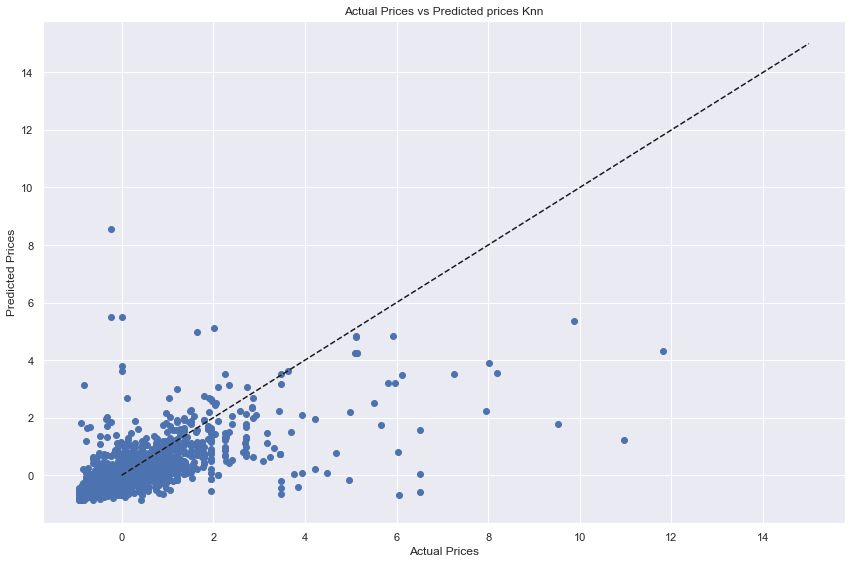

In [105]:
plt.figure(figsize=(12, 8));
plt.scatter(knn_data["Precio Real"], knn_data["Precio Estimado"]);
plt.plot([0, 15], [0, 15], '--k');
plt.axis('tight');
plt.xlabel("Actual Prices");
plt.ylabel("Predicted Prices");

plt.title("Actual Prices vs Predicted prices Knn");
plt.tight_layout();

### 7.3. Support Vector Machine

El modelo "Support Vector Machine" (SVM) o Regresión de Vectores de Soporte eatá basado en que se trata de buscar un hiperplano que optimice la separación entre un conjunto de datos con dos clases linealmente separados. Un hiperplano es definifo como el plano que marce la frontera de decisión entre clases diferentes dentro de un conjunto de datos. El objetivo del algortimo es el del encontrar aquel hiperplano con el mayor margen de separación entre los vectores de soporte.

In [106]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

In [107]:
#Creación del modelo
sv_model=SVR(kernel="rbf" )

#Entrenamiento del modelo
sv_model.fit(train_norm_x,train_norm_y)

SVR()

**Predicción y evaluación del modelo**

In [177]:
predicciones_svm=sv_model.predict(test_norm_x)

rmse_svm = mean_squared_error(
        y_true  = test_norm_y,
        y_pred  = predicciones_svm,
        squared = False
       )
r2_svm=r2_score(test_norm_y, predicciones_svm)

mean_absolute_error_svm=mean_absolute_error(test_norm_y, predicciones_svm)

print("Error cuadrático medio: ", rmse_svm)
print("Coeficiente R2: ",r2_svm)



Error cuadrático medio:  0.7362329137877199
Coeficiente R2:  0.4579610966556438


In [110]:
predicciones_DF_svm=pd.DataFrame(predicciones_svm, index=test_norm_y.index)
rf_data2=pd.concat([test_norm_y,predicciones_DF_svm], axis=1)

rf_data2.columns=["Precio Real", "Precio Estimado"]
rf_data2.head()     

,Precio Real,Precio Estimado
5924,1.351907,1.055354
7205,-0.754644,-0.695440
7994,0.139504,0.152328
12114,-0.481854,-0.651478
8800,-0.739489,-0.544141


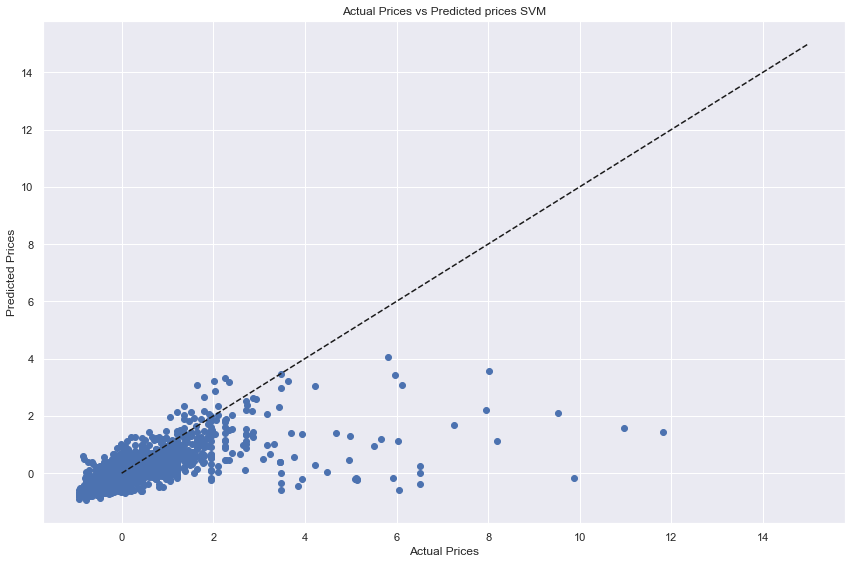

In [111]:
plt.figure(figsize=(12, 8));
plt.scatter(rf_data2["Precio Real"], rf_data2["Precio Estimado"]);
plt.plot([0, 15], [0, 15], '--k');
plt.axis('tight');
plt.xlabel("Actual Prices");
plt.ylabel("Predicted Prices");

plt.title("Actual Prices vs Predicted prices SVM");
plt.tight_layout();

### 7.4 Random Forest

Procederemos ahora a utilizar uno de los métodos más utilizados para modelos de regresión, Random Forest.  

Este tipo modelo esta formado por una serie de árboles de decisión individuales (N) los cuales son entrenados por una muestra aleatoria extraída de los datos de entrenamiento y diferente para cada uno de ellos, de tal manera que ninguno de los árboles ve todos los datos de entrenamiento. Los resultado de la regresión son combinados para obtener su media aritmética, lo que quiere decir que cuanto más árboles tenga el modelo, más robusto será el bosque y más precisa será la predicción. Promediando este conjunto de modelos conseguimos reducir la varianza, por lo que se puede considerar a Random Forest como un modelo "Bagging". 

Por otro lado, hay que tener en cuenta que los resultados de este modelo estarán condicionados por los hiperparámetros especificados. En este modelo, estos hiperparámetros se refieren al número de árboles de decisión y al número de features considerados por cada árbol cuando se divide el nodo. Aunque el número de árboles no es un hiperparámetro crítico (un mayor número de ellos solo puede mejorar el resultado), será interesante determinar el número óptimo para no perder recursos computacionales.

Antes de entrenar al modelo con nuestros datos, empezaremos aplicando una profundidad máxima de crecimiento de cada arbol de 10, 15 o 20, y un número de árboles de 150, 200 o 250. Posteriormente, la función GridSearchCV nos ayudará a determinar los mejores valores de nuestros parámetros para optimizar el modelo dentro de la lista que hemos determinado, mediante un proceso de validación cruzada. Se trata de una técnica para evaluar modelos de machine learning mediante el entrenamiento de varios modelos en subconjuntos de los datos de entrada disponibles y evaluarlos con el subconjunto complementarios de los datos. Las limitaciones computacionales hacen que los números en la lista de hiperparámetros utilizado sea reducido, por lo que no estamos exprimiendo gran parte de su potencial




In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [113]:
parameters_forest = ({'max_depth': [10, 15, 20],
                      'n_estimators': [150, 200, 250]})

#Creación del modelo
modelo=RandomForestRegressor()

#Ajustamos el modelo a nuestra de lista de parámetros y determinamos el número de conjuntos en los que 
#se dividirán los datos para la validación cruzada (cv)

grid = GridSearchCV(modelo, parameters_forest, n_jobs=4, cv=3)

#Entrenamiento del modelo 
grid.fit(train_norm_x, train_norm_y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [10, 15, 20],
                         'n_estimators': [150, 200, 250]})

El atributo best_params_ nos dará los mejores parámetros para nuesto modelo a partir de los parámetros definidos en "parameters forest"

In [114]:
grid.best_params_

{'max_depth': 20, 'n_estimators': 200}

Obtenemos como hiperparámetros óptimos una profundidad máxima que pueden alcanzar los árboles de 20, y un número de árboles incluidos en el modelo de 200. Estos serán ahora los especificados para entrenar al modelo.

In [115]:
forest = RandomForestRegressor(max_depth = grid.best_params_['max_depth'],
                               n_estimators= grid.best_params_['n_estimators'])
forest.fit(train_norm_x, train_norm_y)
forest.score(train_norm_x, train_norm_y)
print("Coeficiente de determinación:",forest.score(train_norm_x, train_norm_y))

Coeficiente de determinación: 0.9360623633285103


El coeficiente de determinación obtenido es de 0.93 lo que quiere decir que según nuestro modelo de Random Forest, el 93% del precio está explicado por el modelo, una cifra muy elevada que indica que está funcionando bien.  

**Predicción y evaluación del modelo** 

Una vez entrenado el modelo, evaluaremos la capacidad predicitiva de éste con nuestro conjunto test con las distintas medidas ya usadas.

In [205]:
from sklearn.metrics import mean_squared_error, r2_score

predicciones_r_forest=forest.predict(test_norm_x)

rmse_r_forest = mean_squared_error(
        y_true  = test_norm_y,
        y_pred  = predicciones_r_forest,
        squared = False
       )
r2_r_forest=r2_score(test_norm_y, predicciones_r_forest)

mean_absolute_error_r_forest=mean_absolute_error(test_norm_y, predicciones_r_forest)

print("Error cuadrático medio: ", rmse_r_forest)
print("Coeficiente R2: ",r2_r_forest)

Error cuadrático medio:  0.7155877151512497
Coeficiente R2:  0.4879342219246138


In [117]:
predicciones_DF_rf=pd.DataFrame(predicciones_r_forest, index=test_norm_y.index)
rf_data=pd.concat([test_norm_y,predicciones_DF_rf], axis=1)

rf_data.columns=["Precio Real", "Precio Estimado"]
rf_data.head()       

,Precio Real,Precio Estimado
5924,1.351907,0.688989
7205,-0.754644,-0.651953
7994,0.139504,0.104530
12114,-0.481854,-0.560812
8800,-0.739489,-0.526839


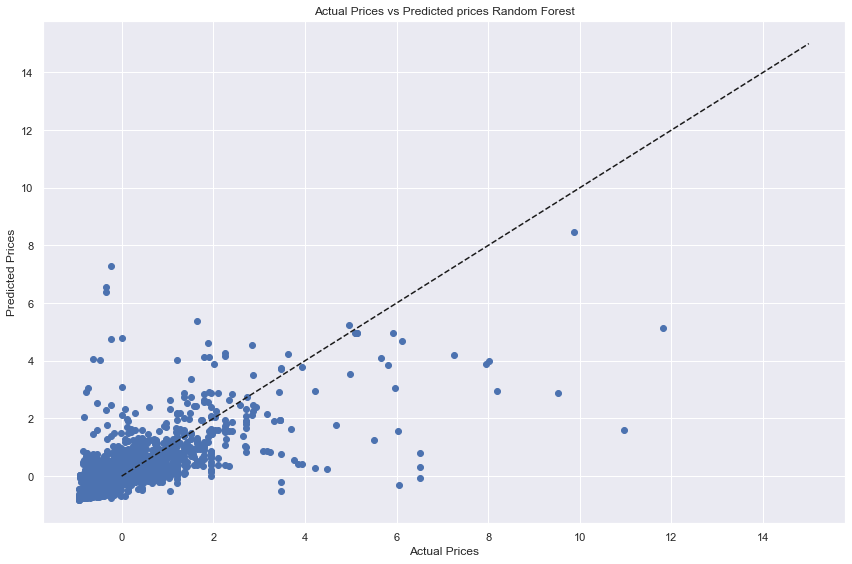

In [179]:
plt.figure(figsize=(12, 8));
plt.scatter(rf_data["Precio Real"], rf_data["Precio Estimado"]);
plt.plot([0, 15], [0, 15], '--k');
plt.axis('tight');
plt.xlabel("Actual Prices");
plt.ylabel("Predicted Prices");

plt.title("Actual Prices vs Predicted prices Random Forest");
plt.tight_layout();

### 7.5 Gradient Boost

Gradient Bossting es, al igual que Random Forest, un modelo basado en árboles. En este caso, el algoritmo funciona realizando una serie de árboles de decisión individuales, que son entrenados de forma secuencial haciendo que cada nuevo árbol mejora los errores del anterior. 

La lista de hiperparámetros utilizada será la misma que la del modelo de Random Forest. Con el objetivo de optimizar los hiperparámetros, haremos uso de Grid Search al igual que con el modelo Random Forest

In [119]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor

In [120]:
parameters_gb= ({'max_depth': [10, 15, 20],
                    'n_estimators': [150, 200, 250],
                'max_features':["auto", 3, 5, 10, 20]}) 

modelo_GBoost=GradientBoostingRegressor()

grid_gb= GridSearchCV(modelo_GBoost, parameters_gb, n_jobs=4, cv=3)



In [121]:
grid_gb.fit(train_norm_x, train_norm_y)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=4,
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['auto', 3, 5, 10, 20],
                         'n_estimators': [150, 200, 250]})

In [122]:
grid_gb.best_params_

{'max_depth': 10, 'max_features': 3, 'n_estimators': 150}

In [123]:
gboost = GradientBoostingRegressor(max_depth = grid_gb.best_params_['max_depth'],
                               n_estimators= grid_gb.best_params_['n_estimators'])
gboost.fit(train_norm_x, train_norm_y)


GradientBoostingRegressor(max_depth=10, n_estimators=150)

**Predicción y evaluación del modelo**

In [206]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

predicciones_gb=gboost.predict(test_norm_x)

rmse_gb = mean_squared_error(
        y_true  = test_norm_y,
        y_pred  = predicciones_gb,
        squared = False
       )

r2_gb=r2_score(test_norm_y, predicciones_gb)

mean_absolute_error_gb=mean_absolute_error(test_norm_y, predicciones_gb)

print("Error cuadrático medio: ", rmse_gb)
print("Coeficiente R2: ",r2_gb)


Error cuadrático medio:  0.7034136758209715
Coeficiente R2:  0.5052092006680292


In [126]:
predicciones_DF_gb=pd.DataFrame(predicciones_gb, index=test_norm_y.index)
predicciones_DF_gb=pd.concat([test_norm_y,predicciones_DF_gb], axis=1)

predicciones_DF_gb.columns=["Precio Real", "Precio Estimado"]
predicciones_DF_gb.head()  

,Precio Real,Precio Estimado
5924,1.351907,0.783199
7205,-0.754644,-0.633918
7994,0.139504,0.319310
12114,-0.481854,-0.646961
8800,-0.739489,-0.507629


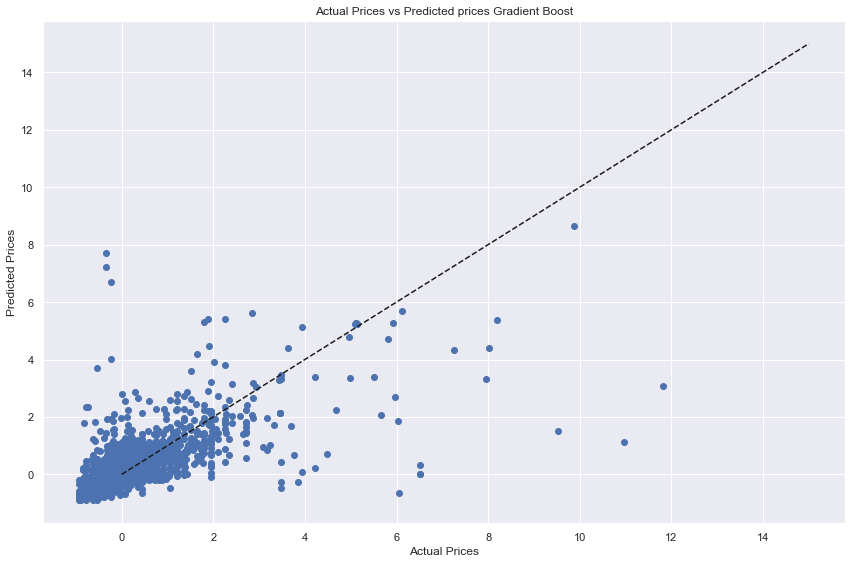

In [127]:
plt.figure(figsize=(12, 8));
plt.scatter(predicciones_DF_gb["Precio Real"], predicciones_DF_gb["Precio Estimado"]);
plt.plot([0, 15], [0, 15], '--k');
plt.axis('tight');
plt.xlabel("Actual Prices");
plt.ylabel("Predicted Prices");

plt.title("Actual Prices vs Predicted prices Gradient Boost");
plt.tight_layout();

### 8. Conclusiones 

Como conclusión del proyecto haremos una comparación de las evaluaciones realizadas de todos los algoritmos utilizados para ver cual de ellos es más preciso a la hora de realizar la tarea de predicción, el objetivo principal de un modelo de machine learning supervisado.

**Comparación de errores cuadráticos medios**

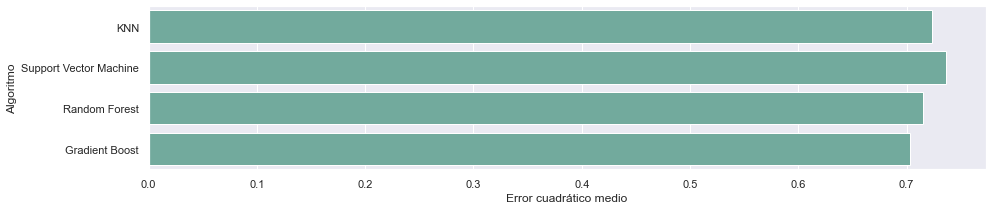

In [149]:
rmse_df=pd.DataFrame({"Algoritmo": ["KNN", "Support Vector Machine", "Random Forest", "Gradient Boost"],
                     "Error cuadrático medio": [rmse_knn, rmse_svm, rmse_r_forest, rmse_gb] })

plt.figure(figsize=(15,3))
sns.barplot(x="Error cuadrático medio",
            y="Algoritmo", 
            data=rmse_df, 
            color='#69b3a2');

En primer lugar, hemos hecho uso de la raiz del error cuadrático medio (RMSE por sus siglas en inglés) como primera métrica para la regresión. Esta mide la diferencia entre el valor real y el valor estimado por el modelo de predicción, y hace una media para cada una de las observaciones, de manera que cuanto mayor sea el valor, mayor será el error y por tanto menos preciso será el modelo. La raíz la incluimos con el objetivo de conseguir una escala en los errores cuadrático medios igual al de las variables. 

Analizando los resultados en nuestros conjuntos de datos vemos que aquellos algoritmos a priori más simples (KNN y SVM) son los que mayor error arrojan, mientras que Random Forest  y Gradient Boost, relacionados con metodologías basadas en árboles de decisón son los que cuentan con errores más bajos.

**Comparación de coeficientes R2**

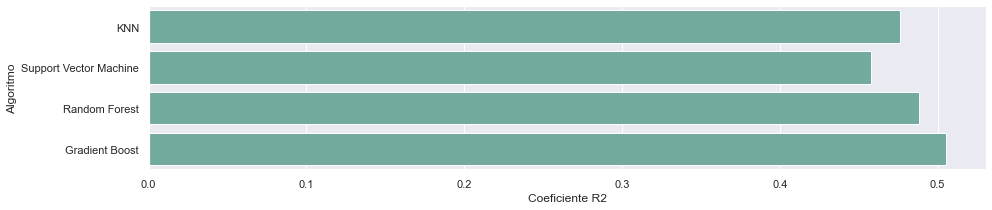

In [148]:
r2_df=pd.DataFrame({"Algoritmo": ["KNN", "Support Vector Machine", "Random Forest", "Gradient Boost"],
                     "Coeficiente R2": [r2_knn, r2_svm, r2_r_forest, r2_gb] })

plt.figure(figsize=(15,3))
sns.barplot(x="Coeficiente R2",
            y="Algoritmo", 
            data=r2_df, 
            color='#69b3a2');

El coeficiente R2 es una métrica muy importante en ejercicio de regresión y se interpreta como la calidad que tiene el modelo de replicar resultados o la proporción de varianza explicada por la regresión. Esto quiere decir, que a mayor coeficiene mayor es la capacidad predictiva del modelo. 

En nuestro caso vemos como aquellos algoritmos que contaban con un error cuadrático medio más bajo son a su vez los que mayor coeficiente de determinación tienen (Gradient Boost y Random Forest).

Podemos concluir por tanto que aquellos algoritmos basados en árboles de decisón han sido los que mejor han funcionado en la tarea de predicción mediante métodos de regresión. 

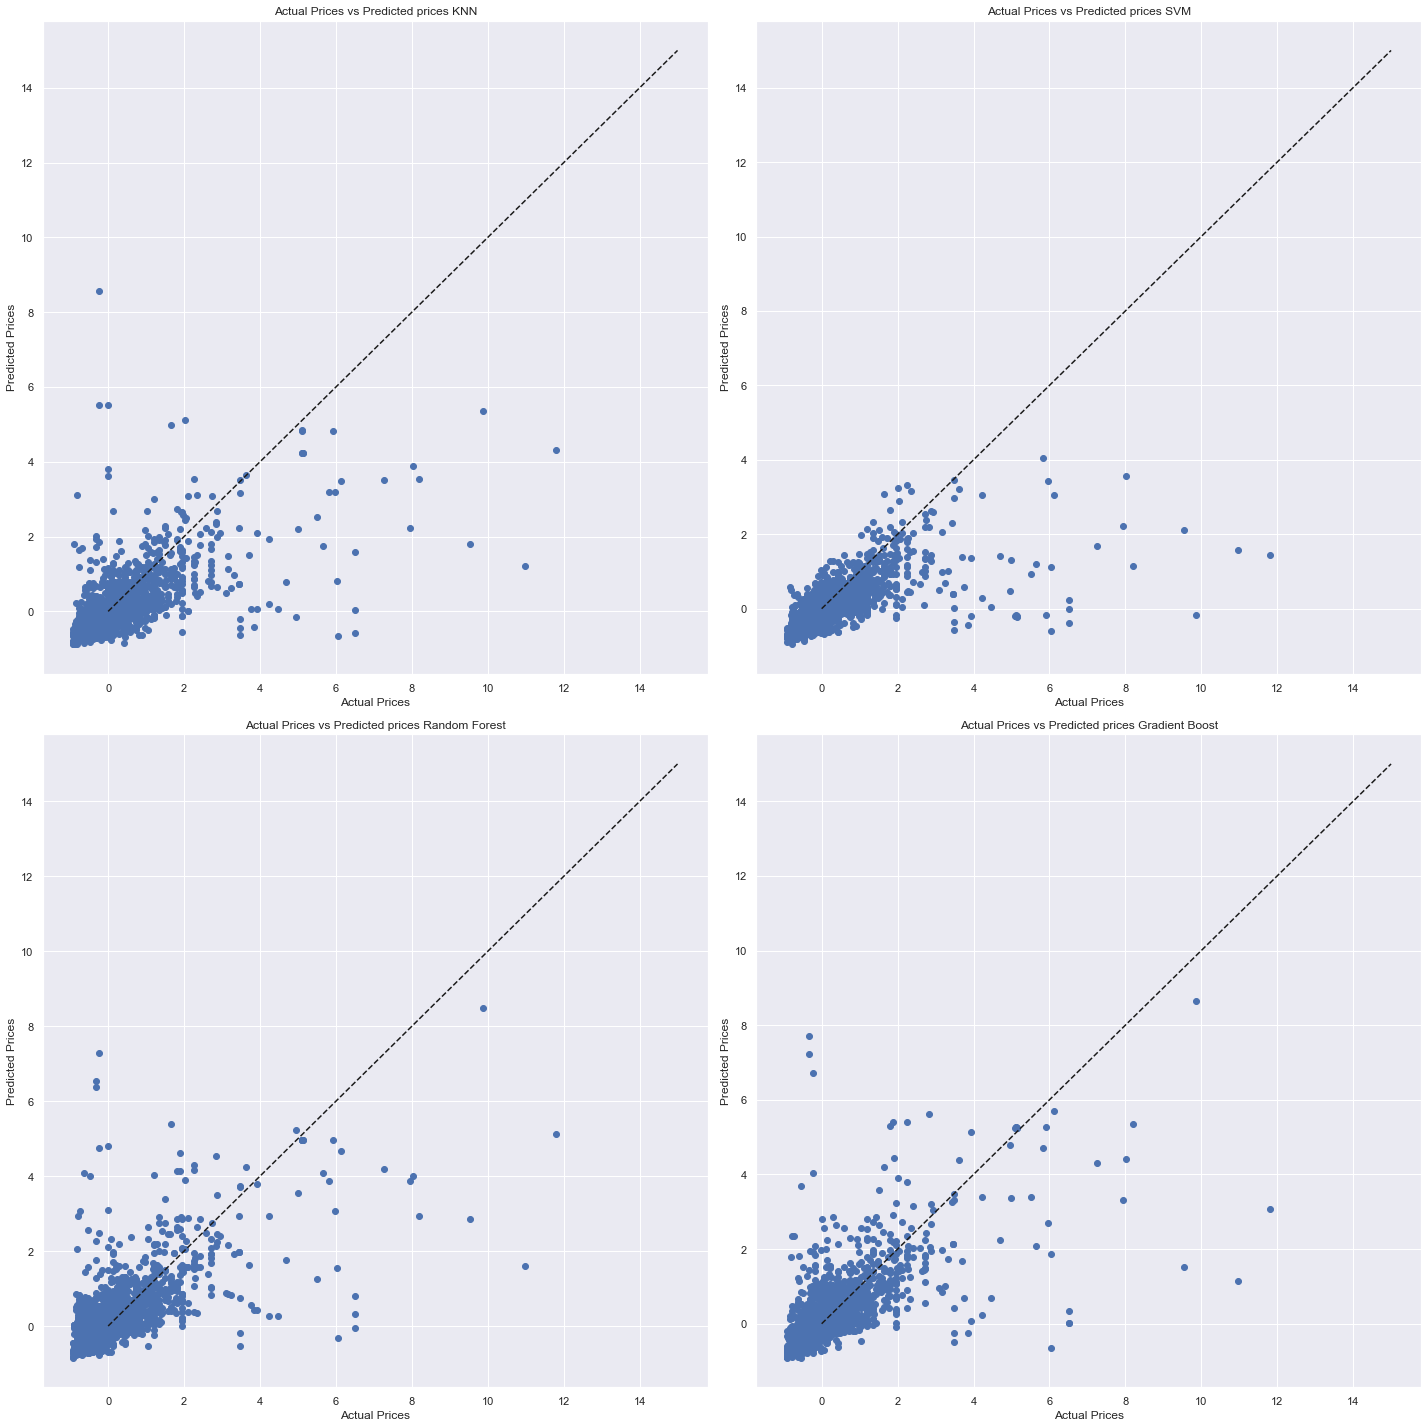

In [204]:
plt.figure(figsize=(20,20));
plt.subplot(221)
plt.scatter(knn_data["Precio Real"], knn_data["Precio Estimado"]);
plt.plot([0, 15], [0, 15], '--k');
plt.axis('tight');
plt.xlabel("Actual Prices");
plt.ylabel("Predicted Prices");
plt.title("Actual Prices vs Predicted prices KNN");
plt.tight_layout();

plt.subplot(222)
plt.scatter(rf_data2["Precio Real"], rf_data2["Precio Estimado"]);
plt.plot([0, 15], [0, 15], '--k');
plt.axis('tight');
plt.xlabel("Actual Prices");
plt.ylabel("Predicted Prices");
plt.title("Actual Prices vs Predicted prices SVM");
plt.tight_layout();

plt.subplot(223)
plt.scatter(rf_data["Precio Real"], rf_data["Precio Estimado"]);
plt.plot([0, 15], [0, 15], '--k');
plt.axis('tight');
plt.xlabel("Actual Prices");
plt.ylabel("Predicted Prices");
plt.title("Actual Prices vs Predicted prices Random Forest");
plt.tight_layout();

plt.subplot(224)
plt.scatter(predicciones_DF_gb["Precio Real"], predicciones_DF_gb["Precio Estimado"]);
plt.plot([0, 15], [0, 15], '--k');
plt.axis('tight');
plt.xlabel("Actual Prices");
plt.ylabel("Predicted Prices");
plt.title("Actual Prices vs Predicted prices Gradient Boost");
plt.tight_layout();



Cómo continuación de las conclusiones haremos un ejericio de visualización sobre los modelos creados. Las siguientes gráficas nos permiten ver de manera más visual la capacidad de predicción de los distintos modelos que hemos utilizado. Se trata de una serie de scatterplots que contienen en el eje y los precios estimados o predichos, y en el eje x los precios actuales. Se ha añadido una recta de la ecuación y=x. Con esto podemos intuir que si un punto se encuentra dentro de estas rectas quiere decir que tanto el valor estimado como el valor real son iguales. 

La principal conclusión que sacamos viene en línea con lo comentado al analizar la variable objetivo. La distribución de ésta  contaba con una formada sesgada a la izquierda, haciéndonos ver que el modelo iba a funcionar mejor para valores bajos. Podemos observar en nuestras gráficas, como la zona con valores más bajos de "Actual Price" y "Estimated Price" cuenta con una mayor concentración de puntos en torno a la línea de referencia que hemos determinado. A medida que nos vamos desplazando por la recta la dispersión de los puntos (aunque hay menor número de ellos), es cada vez mayor, confirmándonos que para valores de precio más altos nuestros modelos son más imprecisos.